In [26]:
import pandas as pd
from collections import Counter
from medvqa.utils.files import read_lines_from_txt

In [35]:
lines = read_lines_from_txt('/mnt/workspace/vinbig-cxr/dataset-png/splits/test.txt')

In [36]:
len(lines)

3000

In [5]:
agreement_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/agreement_df.csv')

In [6]:
agreement_df

,image_id,class_id,iou,n_bbs
0,0005e8e3701dfb1dd93d53e2ff537b6e,4,1.000000,1
1,0005e8e3701dfb1dd93d53e2ff537b6e,6,1.000000,1
2,0005e8e3701dfb1dd93d53e2ff537b6e,7,0.958384,2
3,0005e8e3701dfb1dd93d53e2ff537b6e,8,1.000000,1
4,0007d316f756b3fa0baea2ff514ce945,0,0.619907,2
...,...,...,...,...
15250,ffceb71a80efba3b83c88e11f4b9694b,13,0.307436,2
15251,ffe6f9fe648a7ec29a50feb92d6c15a4,0,1.000000,1
15252,ffe6f9fe648a7ec29a50feb92d6c15a4,3,0.846533,3
15253,ffe6f9fe648a7ec29a50feb92d6c15a4,9,1.000000,1


In [14]:
labels_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/labels.csv')

In [15]:
labels_df

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
0,000434271f63a053c4128a0ba6352c7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00053190460d56c53cc3e57321387478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0005e8e3701dfb1dd93d53e2ff537b6e,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0006e0a85696f6bb578e84fafa9a5607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0007d316f756b3fa0baea2ff514ce945,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,6039aea81ebf9094b5b3a1be940e09eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17996,ace60710b86a4f9e247f6a04c0b64418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17997,1e2a07154cad985c88bf3668850c3587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17998,04669ec4821d2dde14eb2f9a3f47eb7e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
test_ids = read_lines_from_txt('/mnt/workspace/vinbig-cxr/dataset-png/splits/test.txt')

In [39]:
test_ids[-2]

'04669ec4821d2dde14eb2f9a3f47eb7e.png'

In [43]:
labels_df.iloc[-3]

image_id              1e2a07154cad985c88bf3668850c3587
Aortic enlargement                                   0
Atelectasis                                          0
Calcification                                        0
Cardiomegaly                                         0
Consolidation                                        0
ILD                                                  0
Infiltration                                         0
Lung Opacity                                         0
Nodule/Mass                                          0
Other lesion                                         0
Pleural effusion                                     0
Pleural thickening                                   0
Pneumothorax                                         0
Pulmonary fibrosis                                   0
Name: 17997, dtype: object

In [18]:
VINBIG_DISEASES = [
    'Aortic enlargement',
    'Atelectasis',
    'Calcification',
    'Cardiomegaly',
    'Consolidation',
    'ILD',
    'Infiltration',
    'Lung Opacity',
    'Nodule/Mass',
    'Other lesion',
    'Pleural effusion',
    'Pleural thickening',
    'Pneumothorax',
    'Pulmonary fibrosis',
]

In [20]:
import numpy as np

In [22]:
_labels_df = labels_df[VINBIG_DISEASES]
_labels_array = labels_df[VINBIG_DISEASES].to_numpy().astype(np.int8)

In [25]:
_labels_array[2]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int8)

In [24]:
_labels_df

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
Counter(labels_df['Nodule/Mass'])

Counter({0.0: 17174, 1.0: 826})

In [45]:
true_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/true_df.csv')

In [47]:
true_df

,image_id,class_id,class_name,rad_id,x_min,y_min,x_max,y_max
0,000434271f63a053c4128a0ba6352c7f,14,No finding,R6,0.0,0.0,1.0,1.0
1,00053190460d56c53cc3e57321387478,14,No finding,R11,0.0,0.0,1.0,1.0
2,0005e8e3701dfb1dd93d53e2ff537b6e,4,Consolidation,R8,932.0,567.0,1197.0,896.0
3,0005e8e3701dfb1dd93d53e2ff537b6e,6,Infiltration,R10,900.0,587.0,1205.0,888.0
4,0005e8e3701dfb1dd93d53e2ff537b6e,7,Lung Opacity,R10,900.0,587.0,1205.0,888.0
...,...,...,...,...,...,...,...,...
25966,ffe6f9fe648a7ec29a50feb92d6c15a4,9,Other lesion,R10,563.0,1148.0,593.0,1185.0
25967,ffea246f04196af602c7dc123e5e48fc,14,No finding,R13,0.0,0.0,1.0,1.0
25968,ffeffc54594debf3716d6fcd2402a99f,0,Aortic enlargement,R8,1224.0,733.0,1560.0,1176.0
25969,fff0f82159f9083f3dd1f8967fc54f6a,14,No finding,R8,0.0,0.0,1.0,1.0


In [49]:
len(set(true_df['image_id']))

15000

In [11]:
from medvqa.utils.files import read_lines_from_txt

In [12]:
images = read_lines_from_txt('/mnt/workspace/vinbig-cxr/dataset-png/splits/all.txt')

In [14]:
len(images)

18000

In [50]:
annotations_test_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/annotations_test.csv')

In [57]:
annotations_train_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/annotations_train.csv')

In [60]:
image_labels_train_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/image_labels_train.csv')

In [64]:
image_labels_test_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/image_labels_test.csv')

In [65]:
image_labels_test_df

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
0,e0dc2e79105ad93532484e956ef8a71a,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0aed23e64ebdea798486056b4f174424,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,aa15cfcfca7605465ca0513902738b95,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,665c4a6d2693dc0286d65ab479c9b169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,42da2c134b53cb5594774d3d29faac59,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,a039af299f86007d0d77da077a6def9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2996,aba3d1f5b1c04236f52a8980929b2cfa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2997,6d3d6b53f358a983b486e9e03144eb62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2998,d6678cb7ae39f575d35ab9da6d7cb171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
DISEASES = ['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Clavicle fracture', 'Consolidation', 'Edema',
       'Emphysema', 'Enlarged PA', 'ILD', 'Infiltration', 'Lung Opacity',
       'Lung cavity', 'Lung cyst', 'Mediastinal shift', 'Nodule/Mass',
       'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis', 'Rib fracture', 'Other lesion', 'COPD',
       'Lung tumor', 'Pneumonia', 'Tuberculosis', 'Other diseases',
       'No finding']

In [93]:
len(DISEASES)

28

In [72]:
for x in DISEASES:
    print(Counter(image_labels_test_df[x]), x)

Counter({0: 2780, 1: 220}) Aortic enlargement
Counter({0: 2914, 1: 86}) Atelectasis
Counter({0: 2806, 1: 194}) Calcification
Counter({0: 2691, 1: 309}) Cardiomegaly
Counter({0: 2998, 1: 2}) Clavicle fracture
Counter({0: 2904, 1: 96}) Consolidation
Counter({0: 3000}) Edema
Counter({0: 2997, 1: 3}) Emphysema
Counter({0: 2992, 1: 8}) Enlarged PA
Counter({0: 2779, 1: 221}) ILD
Counter({0: 2942, 1: 58}) Infiltration
Counter({0: 2916, 1: 84}) Lung Opacity
Counter({0: 2991, 1: 9}) Lung cavity
Counter({0: 2998, 1: 2}) Lung cyst
Counter({0: 2980, 1: 20}) Mediastinal shift
Counter({0: 2824, 1: 176}) Nodule/Mass
Counter({0: 2889, 1: 111}) Pleural effusion
Counter({0: 2831, 1: 169}) Pleural thickening
Counter({0: 2982, 1: 18}) Pneumothorax
Counter({0: 2783, 1: 217}) Pulmonary fibrosis
Counter({0: 2989, 1: 11}) Rib fracture
Counter({0: 2906, 1: 94}) Other lesion
Counter({0: 2998, 1: 2}) COPD
Counter({0: 2920, 1: 80}) Lung tumor
Counter({0: 2754, 1: 246}) Pneumonia
Counter({0: 2836, 1: 164}) Tubercu

In [83]:
image_labels_train_df.columns

Index(['image_id', 'rad_id', 'Aortic enlargement', 'Atelectasis',
       'Calcification', 'Cardiomegaly', 'Clavicle fracture', 'Consolidation',
       'Edema', 'Emphysema', 'Enlarged PA', 'ILD', 'Infiltration',
       'Lung Opacity', 'Lung cavity', 'Lung cyst', 'Mediastinal shift',
       'Nodule/Mass', 'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis', 'Rib fracture', 'Other lesion', 'COPD',
       'Lung tumor', 'Pneumonia', 'Tuberculosis', 'Other diseases',
       'No finding'],
      dtype='object')

In [92]:
image_labels_train_df[DISEASES].values

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [80]:
for x in DISEASES:
    if x == 'Other disease': x = 'Other diseases'
    print(Counter(image_labels_train_df[x]), x)

Counter({0: 37812, 1: 7188}) Aortic enlargement
Counter({0: 44733, 1: 267}) Atelectasis
Counter({0: 44308, 1: 692}) Calcification
Counter({0: 39570, 1: 5430}) Cardiomegaly
Counter({0: 44971, 1: 29}) Clavicle fracture
Counter({0: 44495, 1: 505}) Consolidation
Counter({0: 44986, 1: 14}) Edema
Counter({0: 44899, 1: 101}) Emphysema
Counter({0: 44844, 1: 156}) Enlarged PA
Counter({0: 44380, 1: 620}) ILD
Counter({0: 44051, 1: 949}) Infiltration
Counter({0: 42955, 1: 2045}) Lung Opacity
Counter({0: 44920, 1: 80}) Lung cavity
Counter({0: 44962, 1: 38}) Lung cyst
Counter({0: 44730, 1: 270}) Mediastinal shift
Counter({0: 43569, 1: 1431}) Nodule/Mass
Counter({0: 42889, 1: 2111}) Pleural effusion
Counter({0: 41743, 1: 3257}) Pleural thickening
Counter({0: 44801, 1: 199}) Pneumothorax
Counter({0: 41729, 1: 3271}) Pulmonary fibrosis
Counter({0: 44850, 1: 150}) Rib fracture
Counter({0: 43357, 1: 1643}) Other lesion
Counter({0: 44954, 1: 46}) COPD
Counter({0: 44522, 1: 478}) Lung tumor
Counter({0: 434

In [23]:
from PIL import Image

In [30]:
img = Image.open('/mnt/workspace/vinbig-cxr/dataset-png/images/' + images[5])

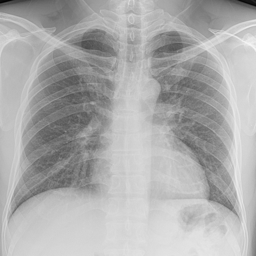

In [31]:
img.resize((256, 256))

In [32]:
images[0]

'6db32897e4b479fcf553e489b4cd255f.png'

In [8]:
!python ../../scripts/vinbig/resize_images.py \
        --width 256 \
        --height 256 \
        --save-folder "/mnt/workspace/vinbig-cxr/dataset-png/images-256x256/"

Resizing 18000 images to 256 x 256 ...
100%|█████████████████████████████████████| 18000/18000 [25:10<00:00, 11.91it/s]
Done!
